# CLASSIFICATIONS OF MAPLE TREE SUBSPECIES

# INTRODUCTION

This project focuses on using deep learning to classify different types of maple tree leaves. By applying a convolutional neural network (CNN) model, we aim to automate the identification process based on various features of the leaves. The project leverages a pre-trained model, fine-tuned to improve accuracy in leaf classification. Through this approach, we aim to explore the effectiveness of machine learning techniques in enhancing plant identification, offering potential applications in fields such as agriculture and environmental monitoring.

## 1. DATA ENGINEER

WAN NUR UMAIRAH BINTI MOHD AZMI - 52213121504

Data Engineer : Data preparation
-	Collecting data
-	Standardize data
-	Creating dataset


# WEB SCRAPING IMAGE USING SELENIUM

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import time
import requests
from PIL import Image
from io import BytesIO

# Initialize Selenium WebDriver
driver = webdriver.Chrome()

# Define search keywords and save path
keywords = ["Sugar Maple leaves", "Red Maple leaves", "Silver Maple leaves", "Japanese Maple leaves"]
output_directory = "datasets/raw"
os.makedirs(output_directory, exist_ok=True)

# Minimum number of images to download per keyword
min_images = 2500

# Function to download and validate images
def download_images(keyword, folder, min_images):
    search_url = f"https://www.google.com/search?q={keyword.replace(' ', '+')}&tbm=isch"
    driver.get(search_url)
    time.sleep(2)  # Allow the page to load

    count = 0
    scroll_attempts = 0

    while count < min_images and scroll_attempts < 50:  # Limit scrolling to avoid infinite loops
        # Scroll to load more images
        driver.execute_script("window.scrollBy(0, 1000);")
        time.sleep(2)
        scroll_attempts += 1

        # Locate image elements
        images = driver.find_elements(By.CSS_SELECTOR, "img")
        print(f"Found {len(images)} images for {keyword} (attempt {scroll_attempts}).")

        for img in images[count:]:  # Start from where we left off
            if count >= min_images:
                break
            try:
                src = img.get_attribute("src")
                if src and "http" in src:  # Ensure it's a valid URL
                    # Skip images that are too small (likely website icons)
                    img_size = img.get_attribute("naturalWidth")
                    if img_size and int(img_size) < 100:  # Filter out small images (less than 100px wide)
                        continue

                    response = requests.get(src, stream=True)
                    if response.status_code == 200:
                        # Check for valid image content type
                        if 'image' not in response.headers.get('Content-Type', ''):
                            continue  # Skip if it's not an image

                        # Save image to the folder
                        filepath = os.path.join(folder, f"{keyword.replace(' ', '_')}_{count + 1}.jpg")
                        with open(filepath, "wb") as file:
                            for chunk in response.iter_content(1024):
                                file.write(chunk)

                        # Validate the downloaded image
                        try:
                            with Image.open(filepath) as im:
                                im.verify()  # Verify if the image is valid
                            print(f"Downloaded and validated: {filepath}")
                            count += 1
                        except (IOError, SyntaxError) as e:
                            print(f"Corrupted image detected, deleting: {filepath}")
                            os.remove(filepath)  # Remove corrupted image
            except Exception as e:
                print(f"Error downloading image {count + 1}: {e}")

    print(f"Finished downloading {count} images for {keyword}. Needed: {min_images}")

# Loop through each keyword and download images
for keyword in keywords:
    folder_path = os.path.join(output_directory, keyword.replace(' ', '_'))
    os.makedirs(folder_path, exist_ok=True)
    download_images(keyword, folder_path, min_images)

# Close the WebDriver
driver.quit()


Found 239 images for Sugar Maple leaves (attempt 1).
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_1.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_2.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_3.jpg
Found 239 images for Sugar Maple leaves (attempt 2).
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_4.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_5.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_6.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_7.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_8.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_9.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar_Maple_leaves_10.jpg
Downloaded and validated: datasets/raw\Sugar_Maple_leaves\Sugar

# STANDARDIZING IMAGES 

In [8]:
import os
import cv2
import numpy as np

# Define paths
input_path = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\raw"
output_path = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\processed"
os.makedirs(output_path, exist_ok=True)

# Define image size
IMG_SIZE = 224

# Define categories
categories = ['Sugar_Maple_leaves', 'Red_Maple_leaves', 'Silver_Maple_leaves', 'Japanese_Maple_leaves']

# List the folders in the raw directory to ensure correct paths
print("Folders in raw directory:", os.listdir(input_path))

# Loop through each category
for category in categories:
    input_folder = os.path.join(input_path, category)
    output_folder = os.path.join(output_path, category)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Ensure the input folder exists before processing
    if not os.path.exists(input_folder):
        print(f"Error: {input_folder} does not exist.")
        continue

    # Process each image in the folder
    for img_name in os.listdir(input_folder):
        try:
            # Read image
            img_path = os.path.join(input_folder, img_name)
            img = cv2.imread(img_path)

            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            # Save processed image
            output_file = os.path.join(output_folder, img_name)
            cv2.imwrite(output_file, img)
            print(f"Processed and saved: {output_file}")
        except Exception as e:
            print(f"Error processing {img_name}: {e}")


Folders in raw directory: ['Japanese_Maple_leaves', 'Red_Maple_leaves', 'Silver_Maple_leaves', 'Sugar_Maple_leaves']
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_Maple_leaves_1.jpg
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_Maple_leaves_10.jpg
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_Maple_leaves_100.jpg
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_Maple_leaves_1000.jpg
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_Maple_leaves_1001.jpg
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_Maple_leaves_1002.jpg
Processed and saved: C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves\Sugar_M

# CREATING DATASETS

In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to your processed dataset
processed_data_dir = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\processed"
output_data_dir = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\split_data"

# Create output directories for train, validation, and test sets
train_dir = os.path.join(output_data_dir, "train")
val_dir = os.path.join(output_data_dir, "val")
test_dir = os.path.join(output_data_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define categories (subspecies)
categories = ['Sugar_Maple_leaves', 'Red_Maple_leaves', 'Silver_Maple_leaves', 'Japanese_Maple_leaves']

# Loop through categories and split data
for category in categories:
    category_path = os.path.join(processed_data_dir, category)  # No 'train' subfolder in the path
    if not os.path.exists(category_path):
        print(f"Category folder not found: {category_path}")
        continue

    files = os.listdir(category_path)
    print(f"Found {len(files)} files in {category_path}")

    # Split the files into train, val, and test
    train_files, temp_files = train_test_split(files, test_size=0.4, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Create class folders inside train, val, and test directories if they don't exist
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Move the files to respective directories
    for file in train_files:
        shutil.move(os.path.join(category_path, file), os.path.join(train_dir, category, file))
    for file in val_files:
        shutil.move(os.path.join(category_path, file), os.path.join(val_dir, category, file))
    for file in test_files:
        shutil.move(os.path.join(category_path, file), os.path.join(test_dir, category, file))

print("Dataset split into train, val, and test directories.")


Found 1795 files in C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Sugar_Maple_leaves
Found 1867 files in C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Red_Maple_leaves
Found 1492 files in C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Silver_Maple_leaves
Found 1884 files in C:\Users\myral\OneDrive\Documents\datasets\datasets\processed\Japanese_Maple_leaves
Dataset split into train, val, and test directories.


# 2. DATA SCIENTIST

 SITI MAIZATUL BINTI ABDUL JALIL - 52213124790

Data Scientist : Data Modelling
-	Creating neural network model
-	Training the model
-	Perform hyperparameter tuning (transfer learning)


Train classes: ['Japanese_Maple_leaves', 'Red_Maple_leaves', 'Silver_Maple_leaves', 'Sugar_Maple_leaves']
Validation classes: ['Japanese_Maple_leaves', 'Red_Maple_leaves', 'Silver_Maple_leaves', 'Sugar_Maple_leaves']
Test classes: ['Japanese_Maple_leaves', 'Red_Maple_leaves', 'Silver_Maple_leaves', 'Sugar_Maple_leaves']
Found 5404 images belonging to 4 classes.
Found 2637 images belonging to 4 classes.
Found 2597 images belonging to 4 classes.


C:\Users\myral\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1697s 10s/step - accuracy: 0.3464 - loss: 2.1718 - val_accuracy: 0.5601 - val_loss: 1.1098
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1153s 7s/step - accuracy: 0.4121 - loss: 1.2364 - val_accuracy: 0.5575 - val_loss: 1.0348
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1133s 7s/step - accuracy: 0.4253 - loss: 1.1852 - val_accuracy: 0.5430 - val_loss: 1.0395
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1116s 7s/step - accuracy: 0.4447 - loss: 1.1712 - val_accuracy: 0.5779 - val_loss: 0.9846
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1122s 7s/step - accuracy: 0.4430 - loss: 1.1768 - val_accuracy: 0.5806 - val_loss: 0.9807
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1115s 7s/step - accuracy: 0.4818 - loss: 1.1270 - val_accuracy: 0.5965 - val_loss: 0.9471
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1100s 7s/step - accuracy: 0.4782 - loss: 1.1273 - val_accuracy: 0.5840 - val_loss: 0.9541
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1117s 7s/step - accuracy: 0.4669 - loss: 1.1288 -

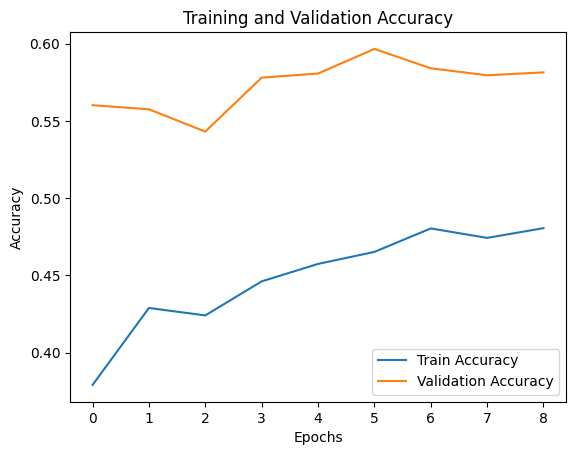

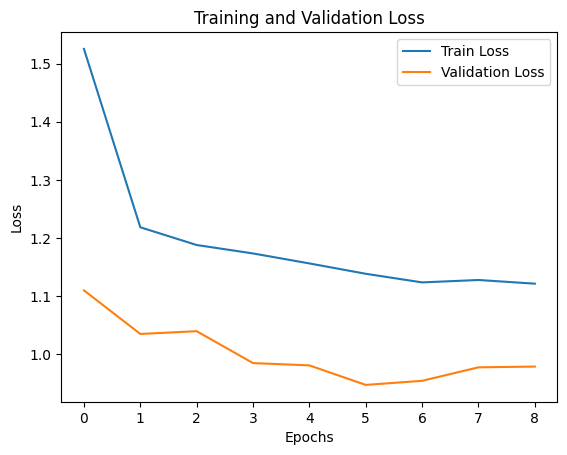

Model saved as maple_classifier_model.h5


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Paths to dataset
dataset_dir = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\split_data"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = len(os.listdir(train_dir))  # Assuming one folder per class

# Check dataset structure
print("Train classes:", os.listdir(train_dir))
print("Validation classes:", os.listdir(val_dir))
print("Test classes:", os.listdir(test_dir))

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,  # Don't shuffle for evaluation
)

# Transfer Learning with VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(NUM_CLASSES, activation="softmax")(x)

# Define model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Specify the CSV file to save training metrics
csv_logger = CSVLogger('training_metrics.csv', append=True)

# Train the model with callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, csv_logger],
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification Report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Training and Validation Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Plot Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Save the model
model.save("maple_classifier_model.h5")
print("Model saved as maple_classifier_model.h5")


# DATA ANALYST

NIK NUR ARIESHA BINTI ROSLIN - 52213124867

Data Analyst : Data visualization
-	Visual the dataset to identify the class and labels
-	Understand the dataset to achieve the goals
-	Visualize the performance of the training model


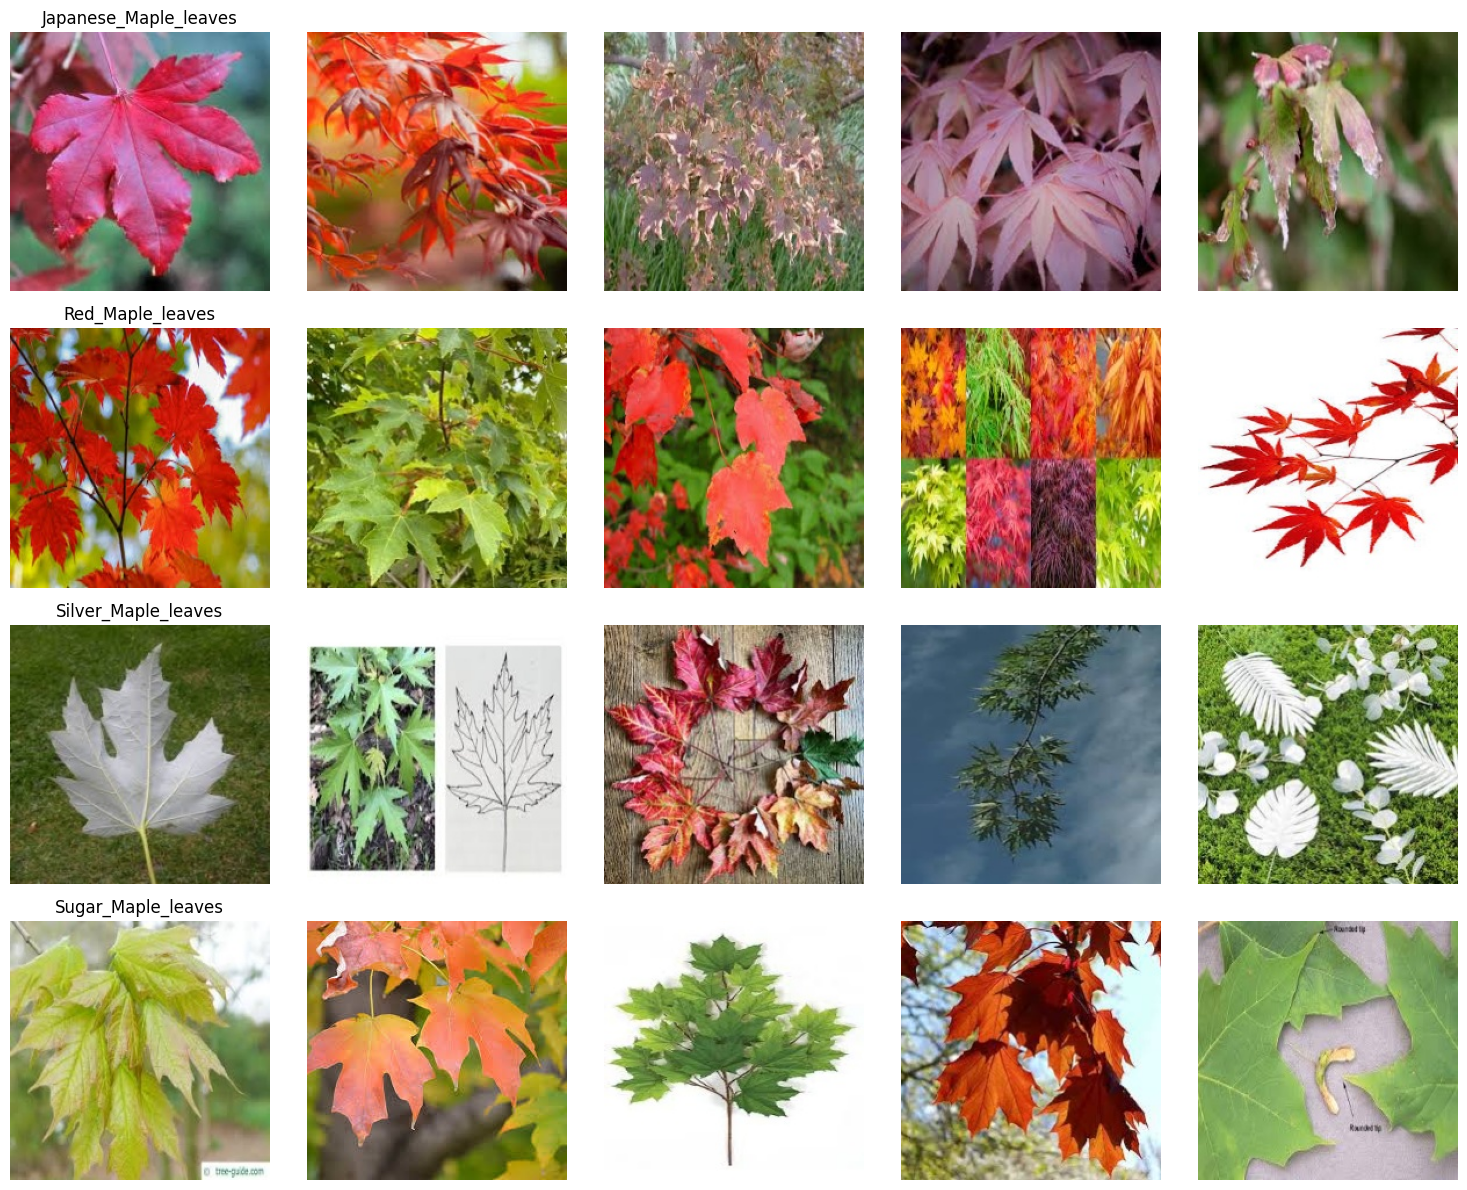

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Define directories
train_dir = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\split_data\train"

# Function to display sample images from each class
def display_samples_from_classes(data_dir, img_size=(224, 224)):
    classes = os.listdir(data_dir)
    fig, axes = plt.subplots(len(classes), 5, figsize=(15, len(classes) * 3))
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)[:5]  # Display first 5 images of each class
        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=img_size)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(class_name, fontsize=12)
    
    plt.tight_layout()
    plt.show()

display_samples_from_classes(train_dir)


C:\Users\myral\AppData\Local\Temp\ipykernel_22188\1941046619.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


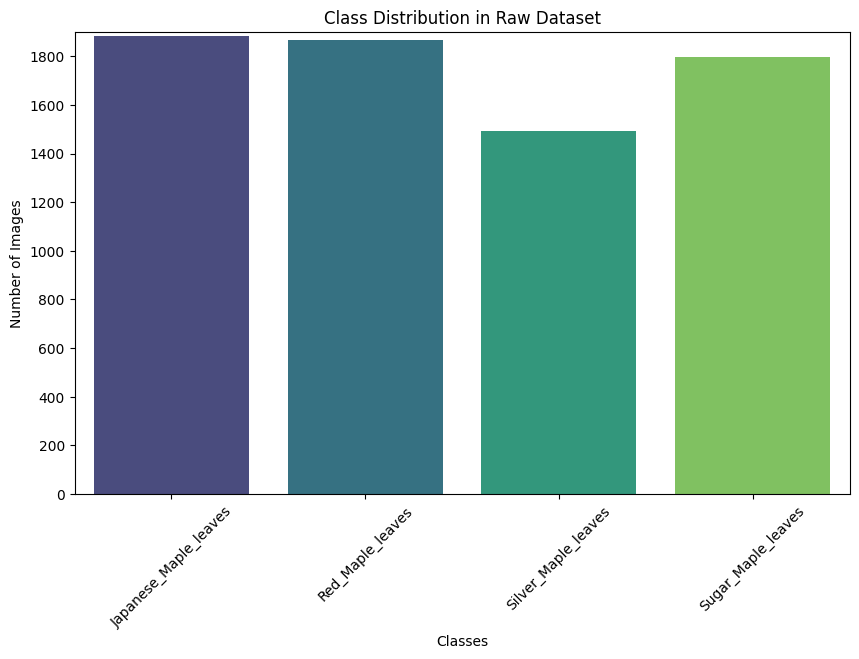

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_class_distribution(data_dir):
    # Correctly calculate image counts in the raw dataset directory
    classes = os.listdir(data_dir)
    counts = [len(os.listdir(os.path.join(data_dir, cls))) for cls in classes]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=classes, y=counts, palette="viridis")
    plt.title("Class Distribution in Raw Dataset")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.ylim(0, 1900)  # Set range from 0 to 1,500
    plt.yticks(range(0, 1901, 200))  # Adjust gaps to 200
    plt.show()

# Call the function for the raw dataset directory
raw_dir = r"C:\Users\myral\OneDrive\Documents\datasets\datasets\raw"
plot_class_distribution(raw_dir)


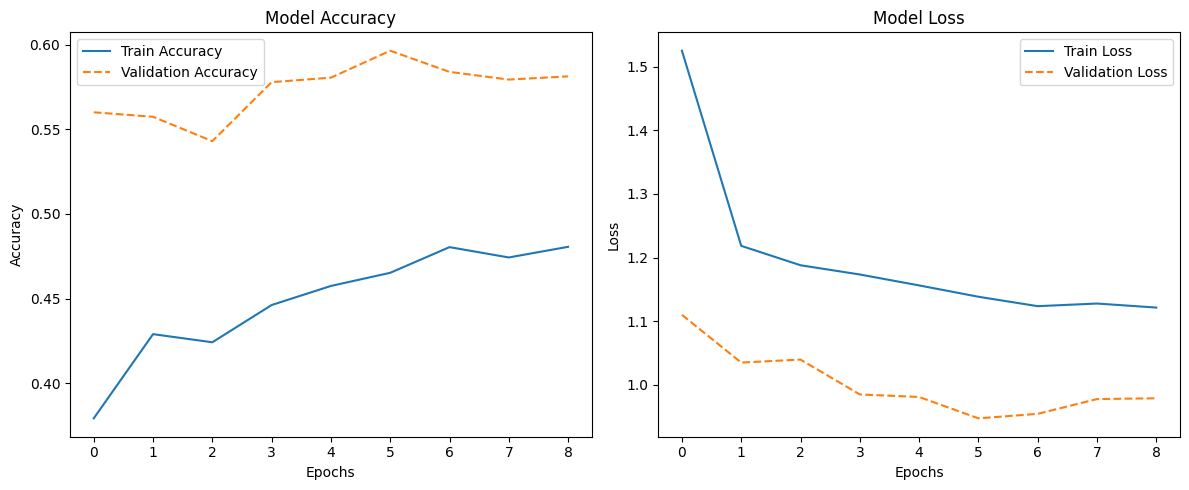

In [4]:
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="--")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss", linestyle="--")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)


# 4. MODEL TESTING

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Model path
model_path = r"C:\Users\myral\OneDrive\Documents\datasets\maple_classifier_model.h5"

# Load your trained model
model = load_model(model_path)

# Class labels (ensure this matches the order used during training)
class_labels = ['Japanese Maple', 'Red Maple', 'Silver Maple', 'Sugar Maple']

# Load and preprocess an image
image_path = r"path_to_image" # Update with the path to your image (download image from web)
img = load_img(image_path, target_size=(224, 224))  # Match target size with model input
img_array = img_to_array(img) / 255.0  # Normalize the image 
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimensionr

# Predict using the model
predictions = model.predict(img_array)

# Print predictions (probabilities)
print(f"Predictions (probabilities): {predictions}")

# Get the index of the highest probability
predicted_index = np.argmax(predictions)

# Map index to class label
predicted_class = class_labels[predicted_index]

# Print the predicted class
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions (probabilities): [[0.3010534  0.40557468 0.13473669 0.1586352 ]]
Predicted Class: Red Maple


# CONCLUSION


The model achieved a test accuracy of 59.34%, showing that it could moderately classify the four types of maple leaves: Japanese Maple, Red Maple, Silver Maple, and Sugar Maple. It performed best on Japanese Maple leaves, with an f1-score of 0.71, meaning it was quite good at identifying this class. However, it struggled the most with Red Maple leaves, which had the lowest f1-score of 0.26, indicating it often misclassified these leaves.  

Looking at the confusion matrix, we can see that the model frequently confused Red Maple and Silver Maple leaves, likely because they share similar features. While the model has potential, there’s definitely room for improvement. Tweaking the base model, gathering a more varied dataset, or training it for longer could help it recognize the differences between the classes better.

To improve accuracy, increasing dataset diversity and applying more robust data augmentation techniques can help the model learn better distinctions. Additionally, fine-tuning the VGG16 base model and carefully adjusting training parameters could enhance performance. These steps are expected to significantly boost the model's classification accuracy and reliability.

# LINK TO YOUTUBE

https://youtu.be/BOAFlZaRONM

# LINK TO GITHUB

https://github.com/unmeiiiii/maple-tree

# LINK TO GOOGLE DRIVE FOR MODEL'S FILE

AS GITHUB DOES NOT ALLOW BIG FILES , PLEASE DOWNLOAD OUR TRAINING MODEL FILE HERE

https://drive.google.com/drive/folders/1rdjNK178TP7uP-LeV8cOZ-3gLpmlkHBg?usp=sharing